# South King County Opportunity Youth

by [Daihong Chen](https://github.com/Daihongchen), [Hamza Masood](https://github.com/hmdev649), and [Calvin Tirrell](https://github.com/calvintirrell)

This project offers an updated estimate of the number of Opportunity Youth in South King County using the 2017 5-year American Community Survey [(ACS)](https://www.census.gov/programs-surveys/acs/about.html) Public Use Microdata Survey [(PUMS)](https://www.census.gov/programs-surveys/acs/technical-documentation/pums.html).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import built-in Python modules
import os
import sys

# Import external libraries
import psycopg2
import pandas as pd
import numpy as np
from tabula import read_pdf
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 80)

# Include the `src` module in the module path for imports
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import custom Python modules in this repository
from src.data import data_collection
from src.data import queries_for_report
from src.visualizations import graphs
from src.visualizations import maps

Before running this report, make sure you have executed the following command, which downloads the relevant data and inserts it into a PostgreSQL database. This line may take as long as 10-20 minutes depending on your network connection and computer specs

In [3]:
#data_collection.download_data_and_load_into_sql()

## Data Tables

Below you will find tabular data about Opportunity Youth in South King County.  All tables labeled **2017** are from our new analysis, and all tables labeled **2016** are re-creations from the [2016 CCER Report](https://roadmapproject.org/wp-content/uploads/2018/09/Opportunity-Youth-2016-Data-Brief-v2.pdf)

In [4]:
df_2017 = queries_for_report.create_df()
df_2016 = queries_for_report.create_basetable_2016()

### Total Youth 2017

In [5]:
ty_2017 = queries_for_report.create_total_youth_2017(df_2017)
ty_2017

,%16-18,16-18,%19-21,19-21,%22-24,22-24,%Total,Total
youthtype,,,,,,,,
Total,100,30141,100,25486,100,30256,100,85883
Opportunity Youth,6,1815,15,3902,16,4897,12,10614
Working without Diploma,14,4377,6,1630,5,1705,8,7712
Not Opportunity Youth,79,23949,78,19954,78,23654,78,67557


### Opportunity Youth 2017

In [6]:
oy_2017 = queries_for_report.create_opportunity_youth_2017(df_2017)
oy_2017

,%16-18,16-18,%19-21,19-21,%22-24,22-24,%Total,Total
educationattainment,,,,,,,,
Total,100,1815,100,3902,100,4897,100,10614
No Diploma,50,916,28,1112,27,1349,31,3377
HS Diploma or GED,43,781,55,2176,43,2135,47,5092
"Some College, No Degree",6,118,13,521,20,1000,15,1639
Degree (Associate or Higher),0,0,2,93,8,413,4,506


### Total Youth 2016

In [7]:
ty_2016 = queries_for_report.create_total_youth_2016(df_2016)
ty_2016

,%16-18,16-18,%19-21,19-21,%22-24,22-24,%Total,Total
Total,100,50053,100,41651,100,48031,100,139735
Opportunity Youth,5,2805,17,7284,18,8728,13,18817
Working without Diploma,1,587,4,2049,5,2877,3,5513
Not Opportunity Youth,93,46661,77,32318,75,36426,82,115405


### Opportunity Youth 2016

In [8]:
oy_2016 = queries_for_report.create_opportunity_youth_2016(df_2016)
oy_2016

,%16-18,16-18,%19-21,19-21,%22-24,22-24,%Total,Total
Total,100,2805,100,7284,100,8728,100,18817
No Diploma,57,1610,28,2048,22,1981,29,5639
HS Diploma or GED,35,985,45,3349,35,3067,39,7401
"Some College, No Degree",6,179,22,1666,20,1763,19,3608
Degree (Associate or Higher),1,31,3,221,21,1917,11,2169


### Race 2017

In [9]:
race_2017 = queries_for_report.create_race_2017(df_2017)
race_2017

,Rate of OY %,Total,Proportion of OY %,Opportunity Youth
race,,,,
Total,12,85883,100,10614
American Indian\Alaska Native,40,851,3,347
Hawaiian and Other Pacific Islander,19,1814,3,360
Black\African American,15,8630,12,1315
Hispanic,13,15942,20,2133
Some other Race alone,5,295,0,16
Two or More Races,13,6353,8,862
White,11,38759,41,4392
Asian,8,13239,11,1189


### Race 2016

In [10]:
race_2016 = queries_for_report.create_race_2016()
race_2016

,Rate of OY %,Total,Proportion of OY %,Opportunity Youth
Total,13,139735,100,18817
American Indian\Alaska Native,31,1242,2,387
Hawaiian and Other Pacific Islander,23,1884,2,439
Black\African American,19,14339,14,2791
Hispanic,17,11490,10,2008
Some other Race alone,17,6473,5,1112
Two or More Races,12,12368,8,1534
White,12,69050,45,8547
Asian,8,22889,10,1999


### Breakdown by Race 2017

In [11]:
queries_for_report.create_race2_2017(df_2017)

,%Black/African American,Black/African American,%Hispanic,Hispanic,%Other Races,Other Races,%White,White,%Total,Total
youthtype,,,,,,,,,,
Not Opportunity Youth,78,6744,71,11355,82,18658,79,30800,78,67557
Opportunity Youth,15,1315,13,2133,12,2774,11,4392,12,10614
Working without Diploma,6,571,15,2454,4,1120,9,3567,8,7712
Total,100,8630,100,15942,100,22552,100,38759,100,85883


## Graph Visualizations

Below you will find bar graphs visualizing various crosstabs of the tabular data shown above.  They have already been saved as figures in the `reports/figures` directory, but if you pass in the argument `export_figure=True` the figures will be re-exported.

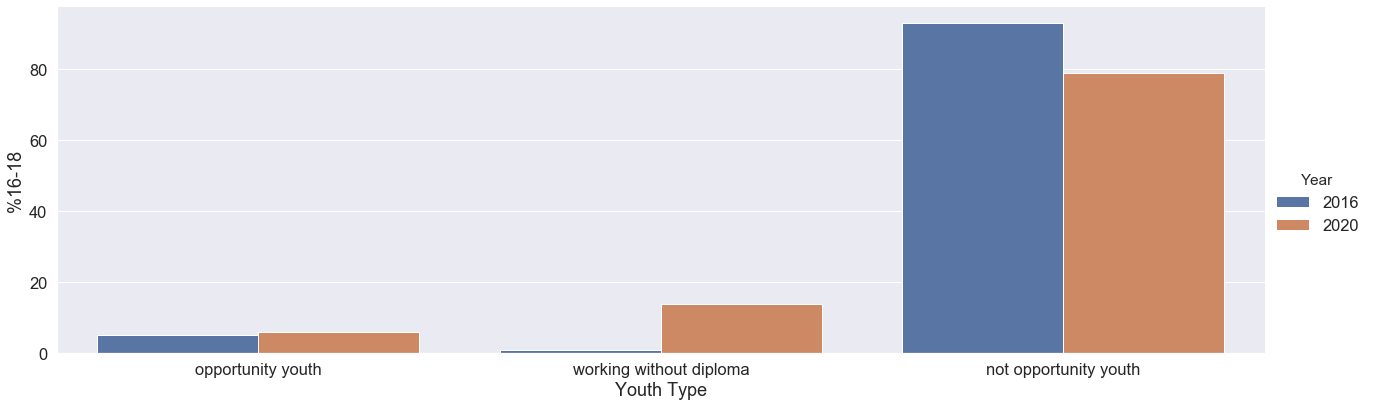

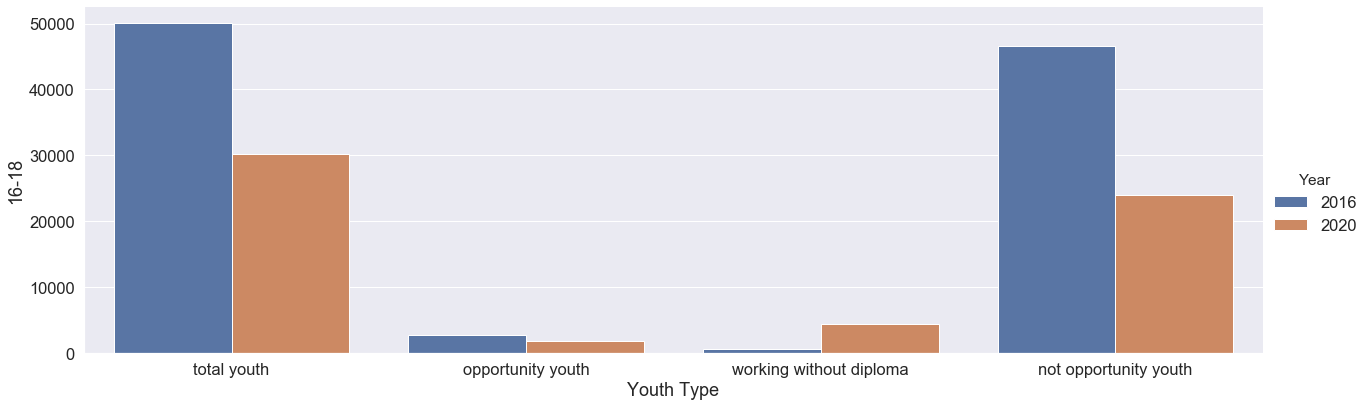

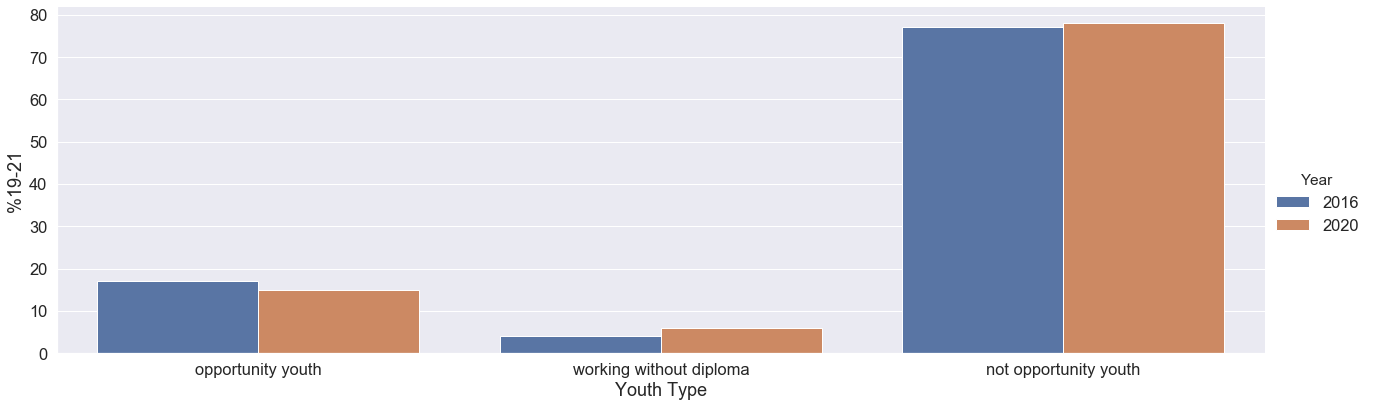

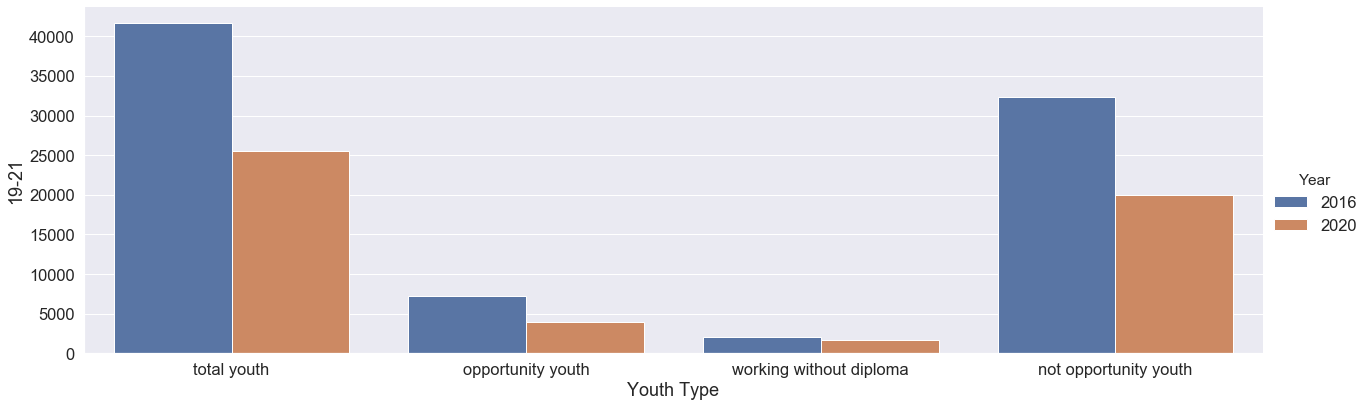

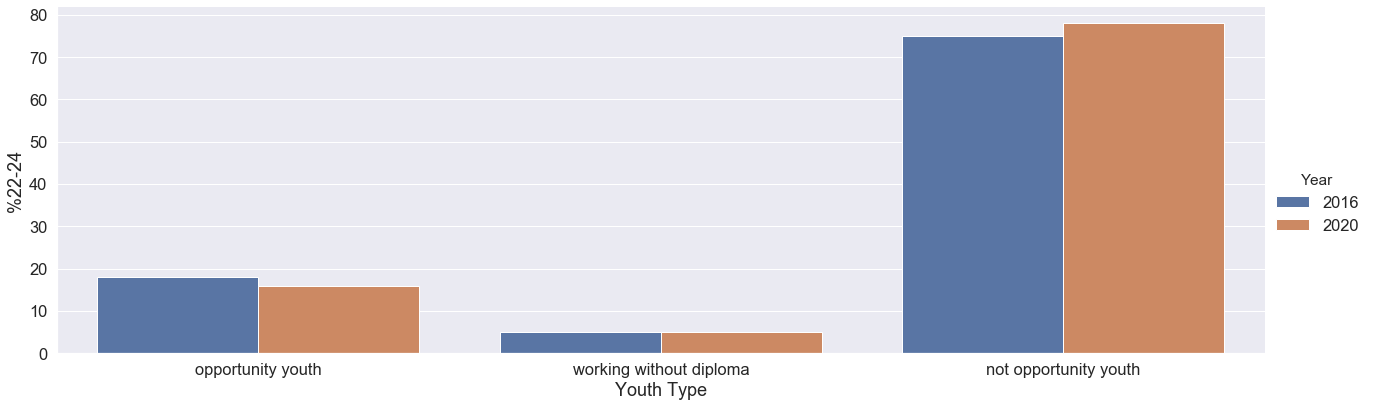

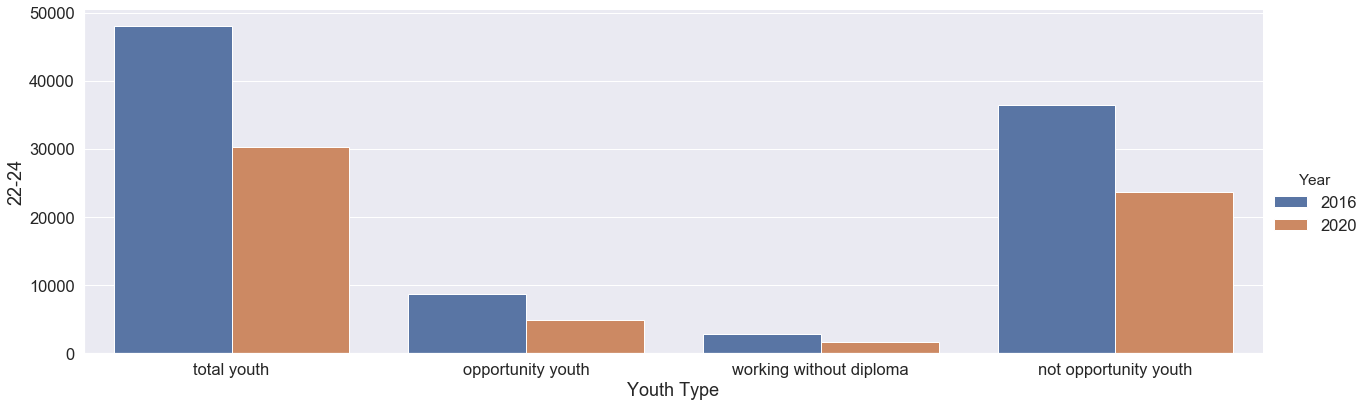

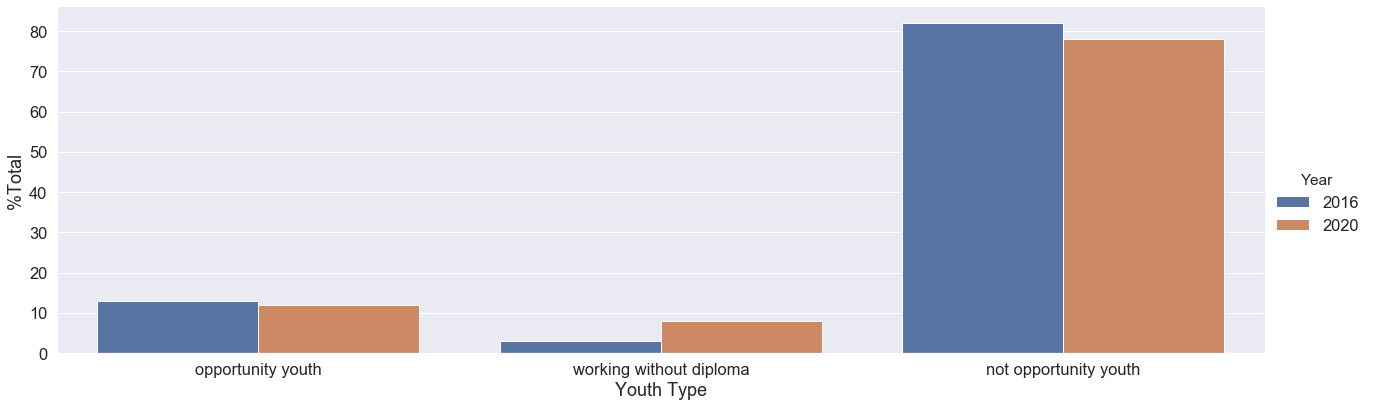

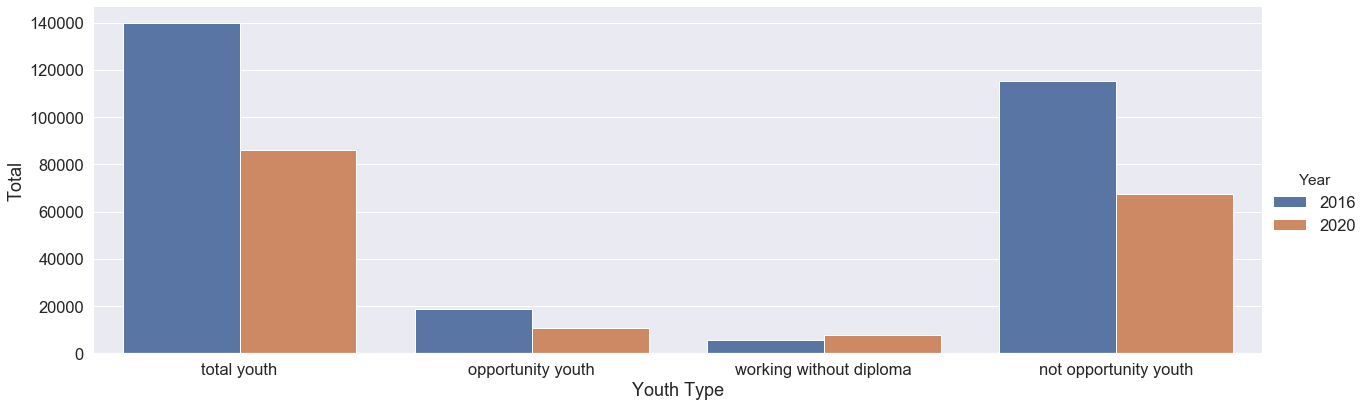

In [12]:
graphs.create_trend_bar_age(ty_2016, ty_2017)

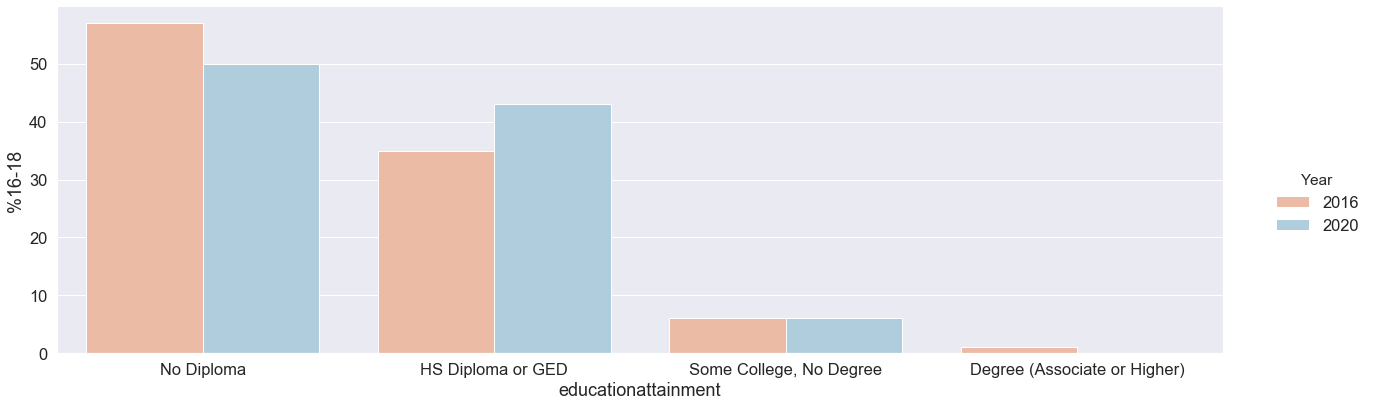

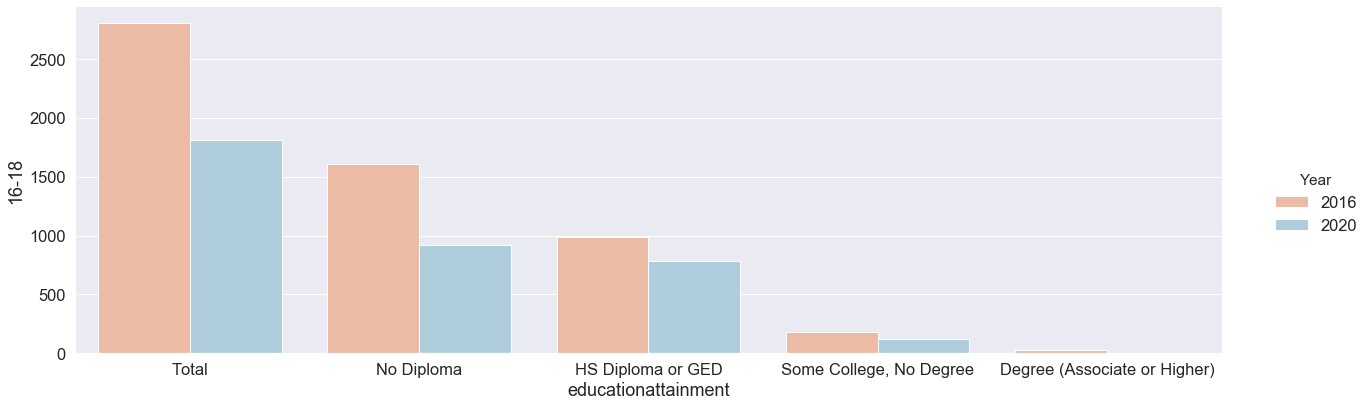

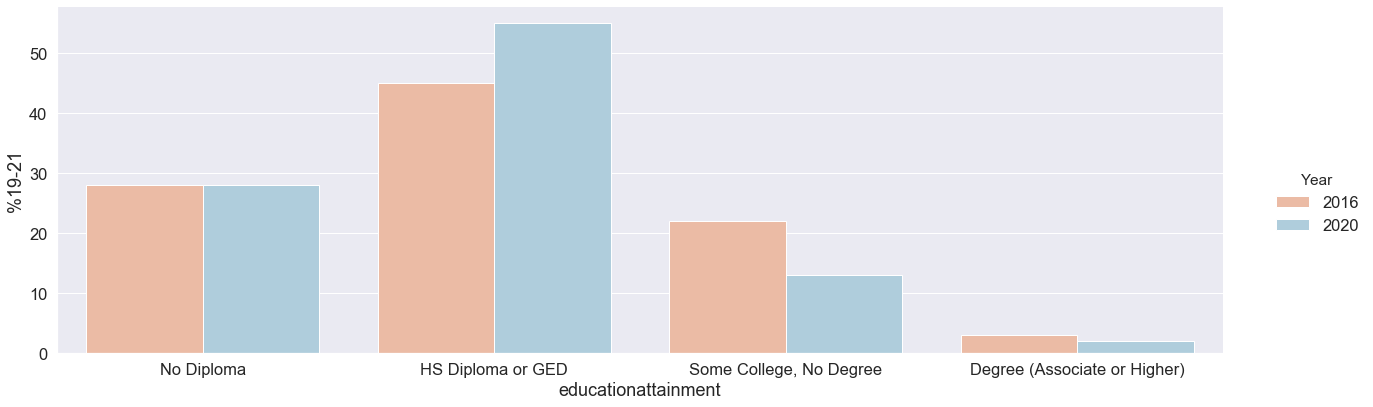

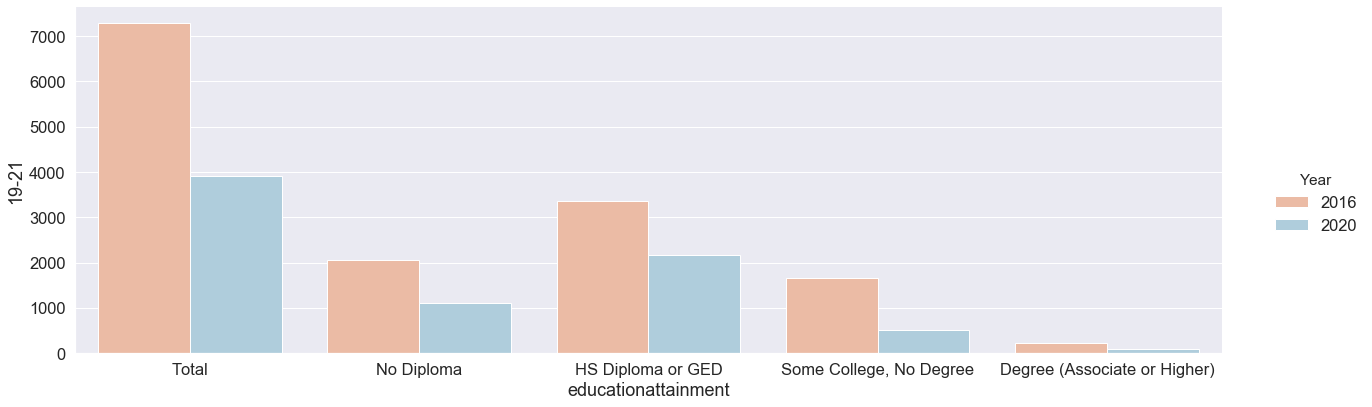

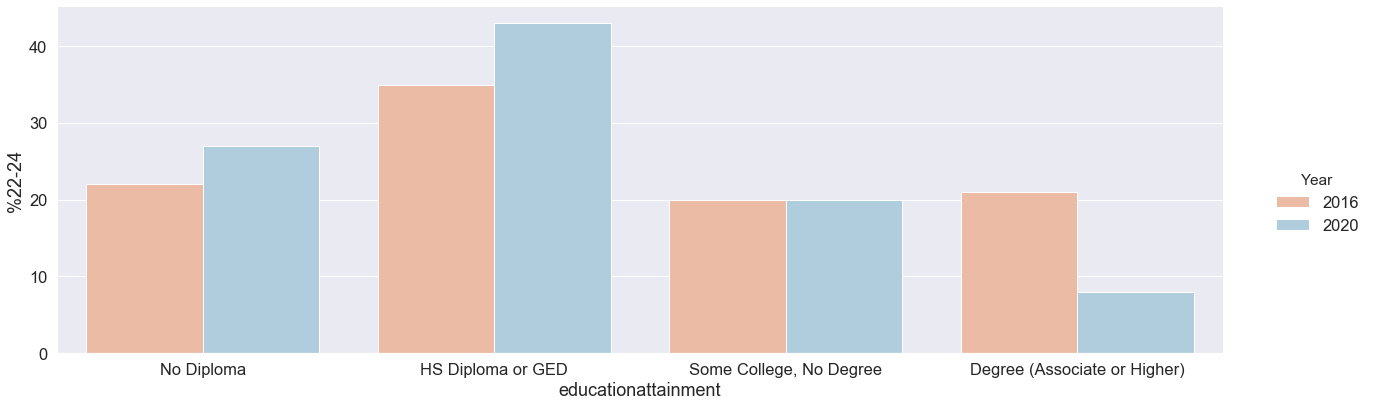

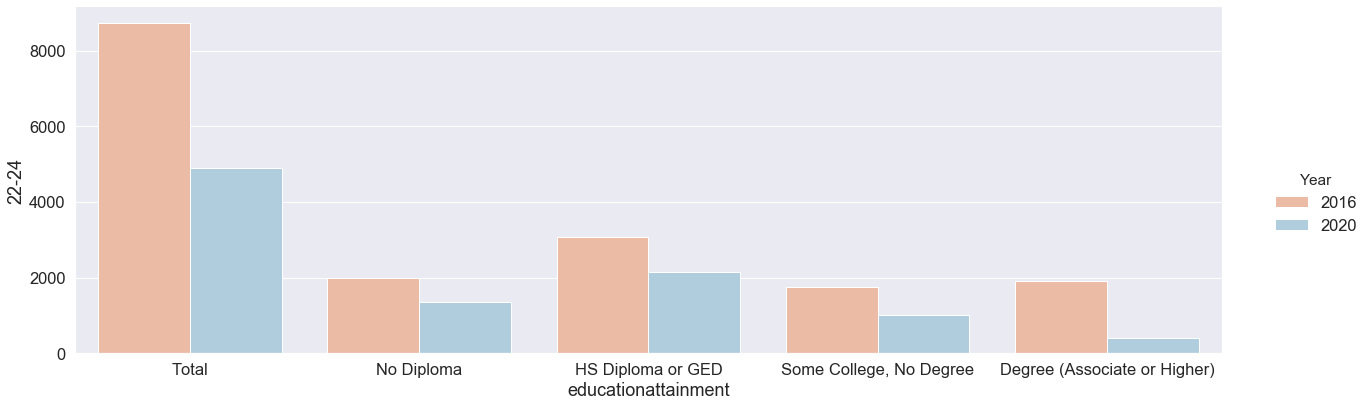

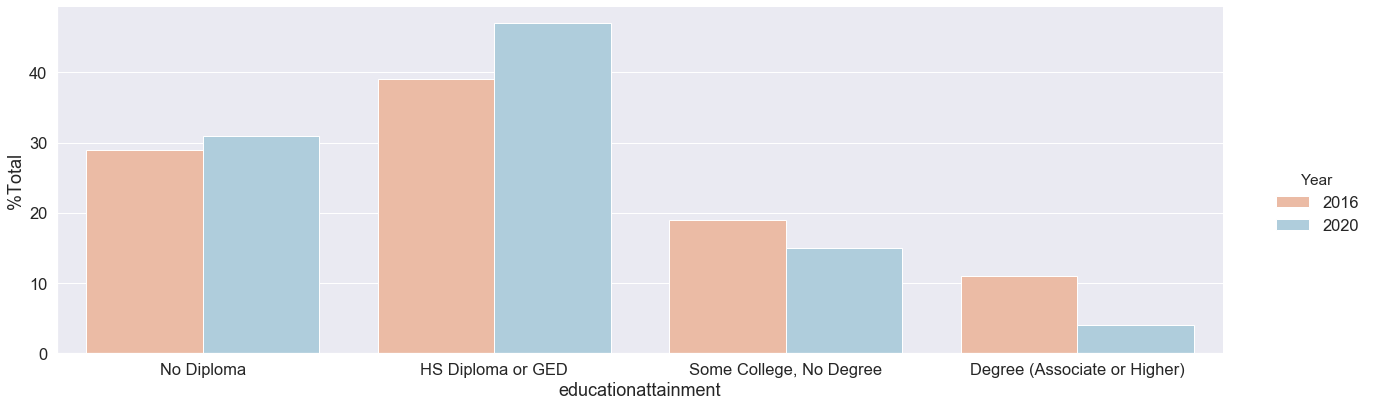

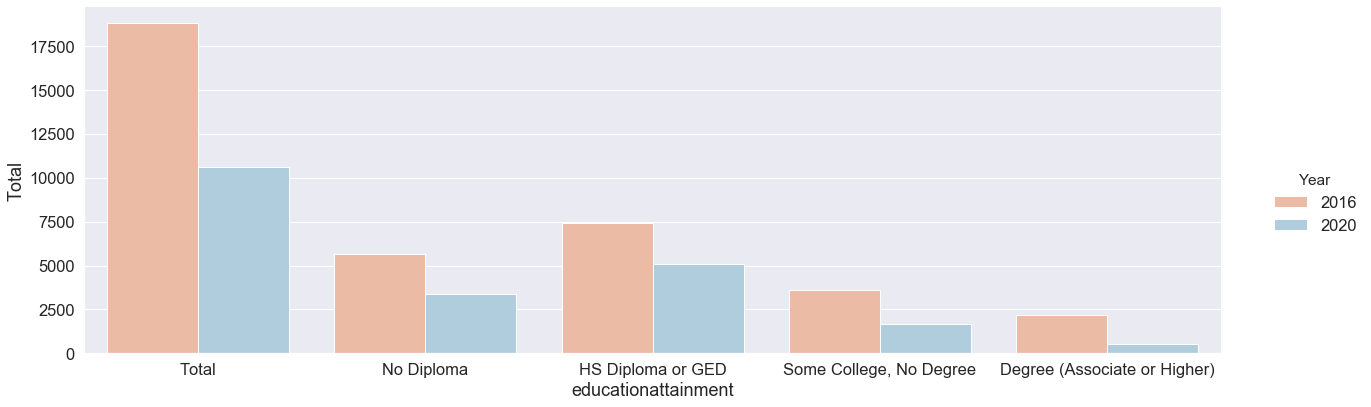

In [13]:
graphs.create_trend_bar_degree(oy_2016, oy_2017)

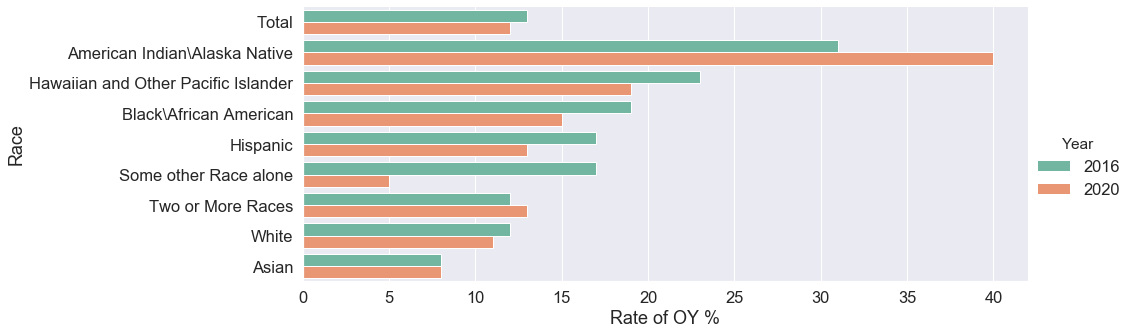

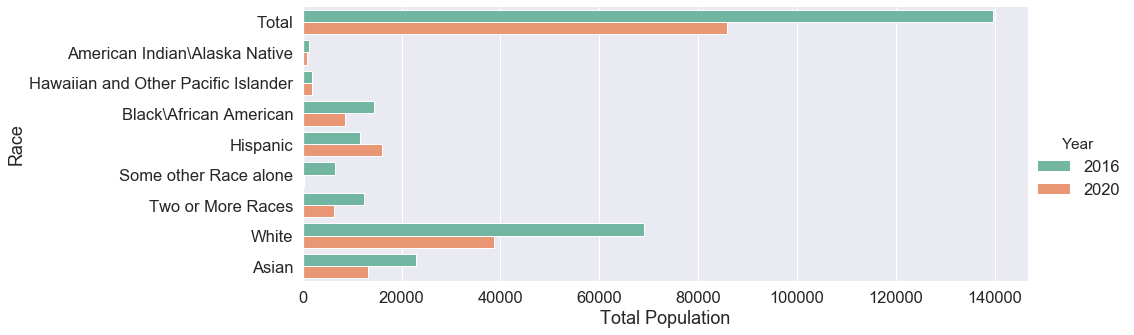

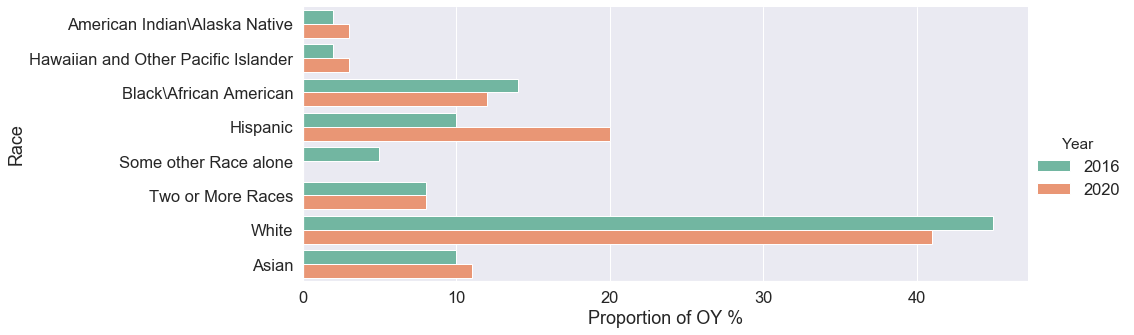

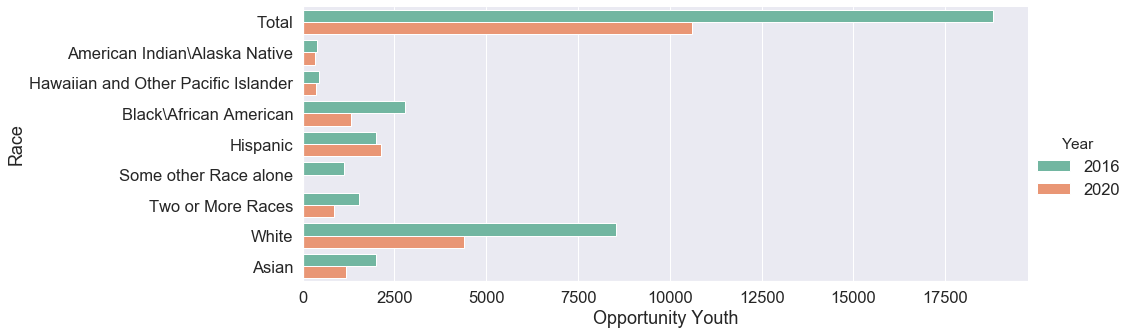

In [14]:
graphs.create_race_bar(race_2016, race_2017)

## Map Visualizations

In [15]:
df = maps.create_df()

### Whole State of Washington

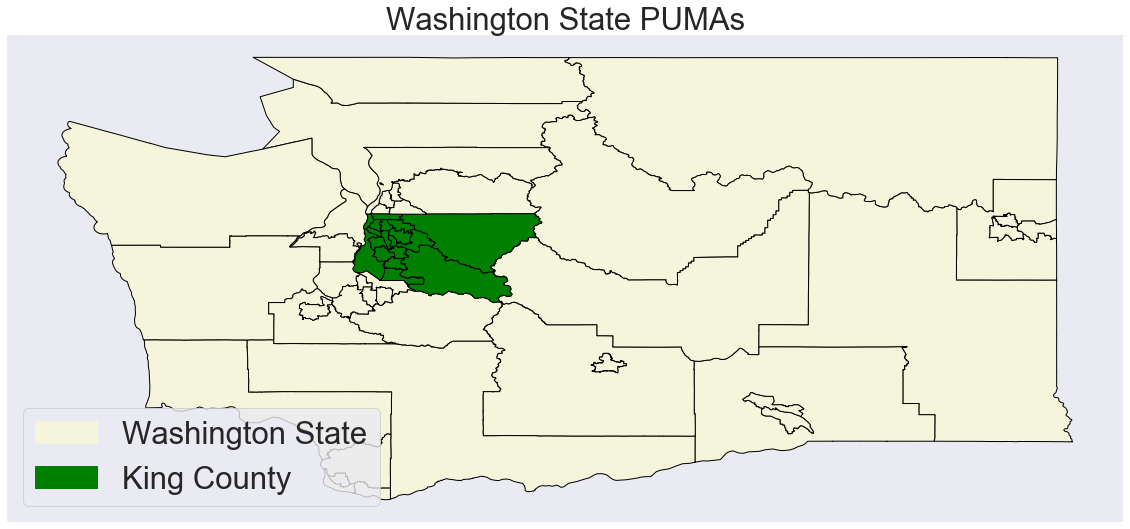

In [16]:
fig1, ax1, cmap = maps.map_creation(["Washington State", "King County"], "Washington State PUMAs");
df.plot(ax=ax1, column="kc", edgecolor="black", cmap=cmap);

### All of King County

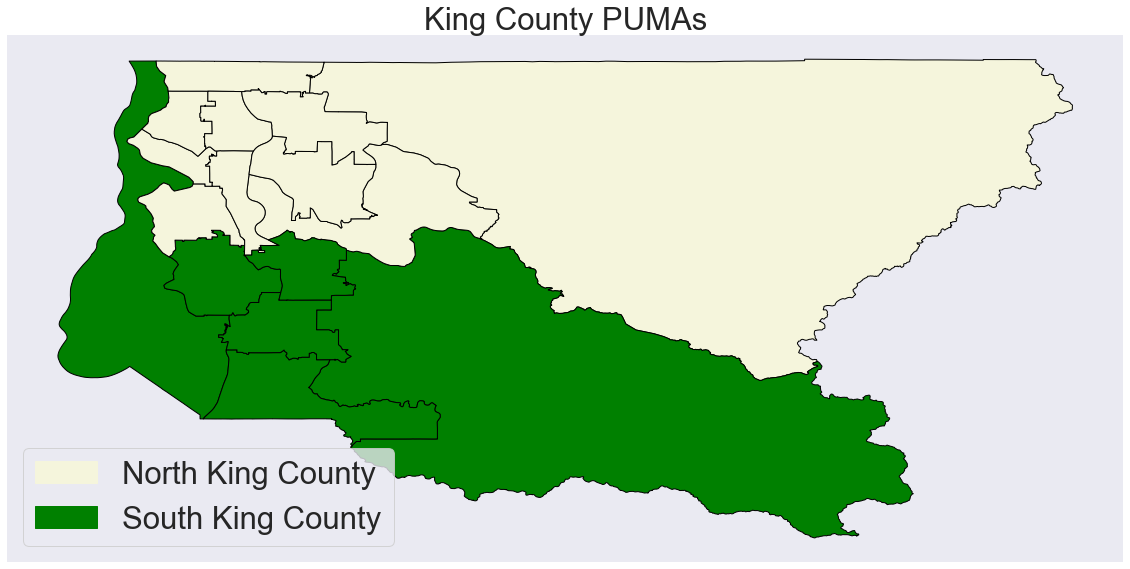

In [17]:
fig2, ax2, cmap = maps.map_creation(["North King County", "South King County"], "King County PUMAs");
df[df["kc"]==True].plot(ax=ax2, column="s_kc", edgecolor="black", cmap=cmap);

### South King County Only

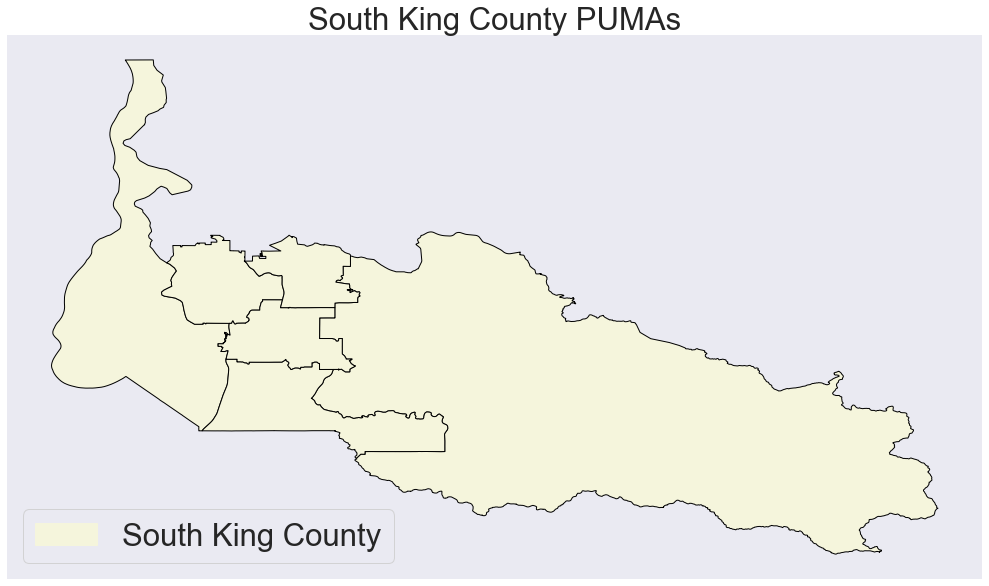

In [18]:
fig3, ax3, cmap = maps.map_creation(["South King County"], "South King County PUMAs");
df[df["s_kc"]==True].plot(ax=ax3, column="s_kc", edgecolor="black", cmap=cmap);

Un-comment the following code to save the map figures

In [19]:
#fc.save_map(fig1, '1_wa_state.png')
#fc.save_map(fig2, '2_king_county.png')
#fc.save_map(fig3, '3_south_king_county.png')